Постройте взвешенный граф, узлами которого будут все гипонимы синсета X (выберите такой Х, у которого не меньше 30 гипонимов), а ребра между ними будут отражать частоту колексификации, т.е. будут устанавливаться в том случае, если хотя бы в одном языке из MultiWordNet найдется слово, которое относится к обоим синсетам; толщина ребра должна отражать количество таких слов. (Иными словами, получится граф, аналогичный графам в CLICS, но на другом материале).

In [1]:
import nltk
from nltk.corpus import wordnet as wn
import networkx as nx
# nltk.download('omw')

In [2]:
# task #1
# get hyponyms of travel.v.01
exemplar = wn.synset('travel.v.01')
hyponyms = exemplar.hyponyms()

частоту колексификации, т.е. будут устанавливаться в том случае, если хотя бы в одном языке из MultiWordNet найдется слово, которое относится к обоим синсетам; толщина ребра должна отражать количество таких слов.

In [3]:
# creating a graph with nodes = hyponym

G = nx.Graph()
G.add_nodes_from(hyponyms)


In [5]:
# creating a language list, we'll get languages from here later
lang_list = wn.langs()
# # a shorter version
# lang_cut = lang_list[:5]
# print(lang_cut)

In [6]:
# getting the list of synsets between which we should create an edge
all_edges_list =[]
d = {}
for lang in lang_list:    
    for node in G:
        word = node.lemma_names(lang)
        for w in word:
            if w not in d.keys():
                d[w] = []
            d[w].append(node)
d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1]) if len(v) > 1}
edge_list = list(d_sorted.values())
# print(edge_list)


In [7]:
# find the longest list of words with the same synset
# this is necessary for having an iteration limiter
maximum = 0
for edge in edge_list:
    if len(edge) > maximum:
        maximum = len(edge)
print(maximum)

20


In [8]:
# creating list of pair tuples
# pair - nodes between which we should have an edge

pair_list = []
for edge in edge_list:
    n_syn = len(edge)
    if n_syn == 2:
        for i in range(0, n_syn - 1):
            e = (edge[i], edge[i + 1])
            pair_list.append(e)
    else:
        for i in range(0, len(edge)):
            e = (edge[i], edge[ (i + 1) % len(edge)])
            pair_list.append(e)

In [9]:
def count(pair_list):      
    count_map = {} 
    for i in pair_list: 
        count_map[i] = count_map.get(i, 0) + 1
    return count_map


In [10]:
edges = count(pair_list)

In [11]:
for key, value in edges.items():   
    G.add_edge(key[0], key[1], weight=value)

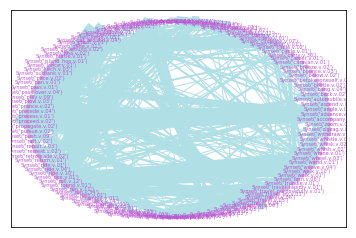

In [16]:
# graph is ready!
import matplotlib.pyplot as plt


pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='plum')
nx.draw_networkx_labels(G, pos, font_size=5, font_color='mediumorchid')
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2], edge_color='powderblue')

In [13]:
# get the number of connected components
conn_comp = nx.algorithms.components.number_connected_components(G)
print('There are {0} connected components in a graph'.format(conn_comp))

There are 26 connected components in a graph


In [14]:
ass_coef = nx.degree_pearson_correlation_coefficient(G)
print('the assortativity coefficient of a graph is {0}'.format(ass_coef))

the assortativity coefficient of a graph is 0.09239950133938857


In [15]:
density = nx.density(G)
print("The graph's density is {0}".format(density))

The graph's density is 0.0585099293615887


In [31]:
w_deg = G.degree

w_deg_dict = {}
for item in w_deg:
    w_deg_dict[item[0]] = item[1]

w_deg_sorted = sorted(w_deg_dict.items(), key=lambda item: item[1], reverse=True)

for item in w_deg_sorted:
    print(item)

(Synset('roll.v.12'), 31)
(Synset('advance.v.01'), 27)
(Synset('wheel.v.03'), 22)
(Synset('travel_by.v.01'), 21)
(Synset('proceed.v.02'), 20)
(Synset('pass.v.01'), 19)
(Synset('rush.v.01'), 19)
(Synset('weave.v.04'), 19)
(Synset('go_around.v.02'), 18)
(Synset('float.v.01'), 17)
(Synset('turn.v.06'), 17)
(Synset('fly.v.01'), 16)
(Synset('rise.v.01'), 16)
(Synset('travel.v.05'), 16)
(Synset('pursue.v.02'), 15)
(Synset('ride.v.01'), 15)
(Synset('walk.v.01'), 15)
(Synset('come.v.01'), 14)
(Synset('drive.v.02'), 14)
(Synset('precede.v.04'), 14)
(Synset('ride.v.10'), 14)
(Synset('circle.v.02'), 13)
(Synset('do.v.13'), 13)
(Synset('drive.v.14'), 13)
(Synset('float.v.02'), 13)
(Synset('glide.v.01'), 13)
(Synset('step.v.01'), 13)
(Synset('travel.v.04'), 13)
(Synset('travel_rapidly.v.01'), 13)
(Synset('descend.v.01'), 12)
(Synset('draw.v.12'), 12)
(Synset('travel.v.06'), 11)
(Synset('walk.v.10'), 11)
(Synset('withdraw.v.01'), 11)
(Synset('ascend.v.01'), 10)
(Synset('slither.v.01'), 10)
(Synset('

In [35]:
clos_cent = nx.algorithms.centrality.closeness_centrality(G)
clos_cent_sorted = sorted(clos_cent.items(), key=lambda item: item[1], reverse=True)
for item in clos_cent_sorted:
    print(item)

(Synset('advance.v.01'), 0.42678521811614334)
(Synset('roll.v.12'), 0.42678521811614334)
(Synset('wheel.v.03'), 0.3975841242450388)
(Synset('travel_by.v.01'), 0.39344262295081966)
(Synset('proceed.v.02'), 0.38738965952080706)
(Synset('rush.v.01'), 0.3796029326962682)
(Synset('weave.v.04'), 0.3739652653789969)
(Synset('pass.v.01'), 0.3721230719534846)
(Synset('draw.v.12'), 0.3684926029588165)
(Synset('drive.v.02'), 0.3667038039153271)
(Synset('rise.v.01'), 0.3667038039153271)
(Synset('travel.v.05'), 0.3667038039153271)
(Synset('fly.v.01'), 0.3649322879543835)
(Synset('ride.v.01'), 0.3649322879543835)
(Synset('turn.v.06'), 0.36317780580075665)
(Synset('go_around.v.02'), 0.3614401129500353)
(Synset('ride.v.10'), 0.35971896955503513)
(Synset('travel.v.04'), 0.35801414031543777)
(Synset('come.v.01'), 0.35632539437055366)
(Synset('walk.v.01'), 0.35632539437055366)
(Synset('travel_rapidly.v.01'), 0.35465250519510505)
(Synset('float.v.01'), 0.3529952504979317)
(Synset('do.v.13'), 0.34972677595

In [36]:
eig_cent = nx.algorithms.centrality.eigenvector_centrality(G)
eig_cent_sorted = sorted(eig_cent.items(), key=lambda item: item[1], reverse=True)
for item in eig_cent_sorted:
    print(item)


(Synset('roll.v.12'), 0.31049158131449495)
(Synset('advance.v.01'), 0.25892205276613833)
(Synset('wheel.v.03'), 0.23113015575567294)
(Synset('travel_by.v.01'), 0.21871479110798567)
(Synset('weave.v.04'), 0.21455523166957563)
(Synset('proceed.v.02'), 0.18673660215401025)
(Synset('rise.v.01'), 0.18371969766919238)
(Synset('pass.v.01'), 0.17322660123301759)
(Synset('go_around.v.02'), 0.16706208827539606)
(Synset('travel.v.05'), 0.163684786908744)
(Synset('float.v.01'), 0.16028474615191127)
(Synset('ride.v.01'), 0.1598342256442724)
(Synset('rush.v.01'), 0.15902128304018093)
(Synset('walk.v.01'), 0.15884765677809445)
(Synset('turn.v.06'), 0.15765510542552347)
(Synset('come.v.01'), 0.14670124536032902)
(Synset('fly.v.01'), 0.14632544339653816)
(Synset('drive.v.02'), 0.1400169238654942)
(Synset('ride.v.10'), 0.13970449702680934)
(Synset('travel.v.04'), 0.13817636429241426)
(Synset('precede.v.04'), 0.13174856468886595)
(Synset('draw.v.12'), 0.12963745474917482)
(Synset('drive.v.14'), 0.1228497

Узлы с наибольшей взвешенной степенью - синсеты 'roll.v.12', 'advance.v.01', 'wheel.v.03', 'travel_by.v.01' и 'proceed.v.02'. Далее взвешенная степень постепенно убывает.

Наиболее центральными (closeness centrality) оказались узлы 'advance.v.01', 'roll.v.12', 'wheel.v.03', 'travel_by.v.01' и 'proceed.v.02'.

Узлы с наибольшим количеством "друзей друзей" (eigencentrality) - 'roll.v.12', 'advance.v.01', 'wheel.v.03', 'travel_by.v.01' и 'weave.v.04'.

Список вершин с наибольшей степенью признака практически один и тот же, даже порядок меняется не сильно. Из этого следует, что все метрики отображают одно и то же положение вещей - концепт 'roll.v.12' оказался наиболее важным по всем параметрам.